# Urban Demography - GUDD Figures

- Author: Andrew Zimmer 
- Date Created: 2024-11-14 
- Last Edited:  2024-11-14 
- Version: 1.0

Description: 
- This script plots the main figures for the manuscript

Input Files:
- './01_data/04_final_demographic_data/01_static_boundaries/gudd_annual_metrics_static_boundaries.csv'
- './01_data/04_final_demographic_data/01_static_boundaries/gudd_change_2000_2020_static_boundaries.csv'

Output Files:

Steps in Script


In [ ]:
# imports
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle, ConnectionPatch
import numpy as np
from pathlib import Path
from matplotlib.gridspec import GridSpec


# data folder
data_folder = '../01_data/'
figure_folder = '../04_documents/01_main_figures/'


In [96]:
annual_metrics = pd.read_csv(Path(data_folder) / '04_final_demographic_data/01_static_boundaries/gudd_annual_metrics_static_boundaries.csv')
change_data = pd.read_csv(Path(data_folder) / '04_final_demographic_data/01_static_boundaries/gudd_change_2000_2020_static_boundaries.csv')

# Figure 1 - Global Dependency Ratio (& Change 2000-2020)

In [ ]:
# only keep cities that appeared for the entire 2000-2020 time period

# limit annual metrics to only include 2020, for plotting
annual_metrics_2020 = annual_metrics[
    (annual_metrics["YearOfBirth"] <= 2000) &
    (annual_metrics["YearOfDeath"] >= 2020) &
    (annual_metrics["year"] == 2020)
].copy()

change_data = change_data[
    (change_data["YearOfBirth"] <= 2000) &
    (change_data["YearOfDeath"] >= 2020)
].copy()

In [98]:
world = gpd.read_file(Path(data_folder) / '02_auxiliary_data/03_mapping/ne_50m_admin_0_countries.shp')

In [99]:
# set colors
# dependency ratio colors
colors_dr = [
    "#053061", "#2166AC", "#4393C3", "#92C5DE",
    "#D1E5F0", "#F4A582", "#D6604D", "#B2182B", "#67001F"
]

# change colors
colors_delta = [
    "#40004B", "#762A83", "#9970AB", "#C2A5CF", "#E7D4E8",
    "#D9F0D3", "#A6DBA0", "#5AAE61", "#1B7837", "#00441B"
]

cmap_dr = mcolors.LinearSegmentedColormap.from_list("dr", colors_dr)
cmap_delta = mcolors.LinearSegmentedColormap.from_list("delta", colors_delta)

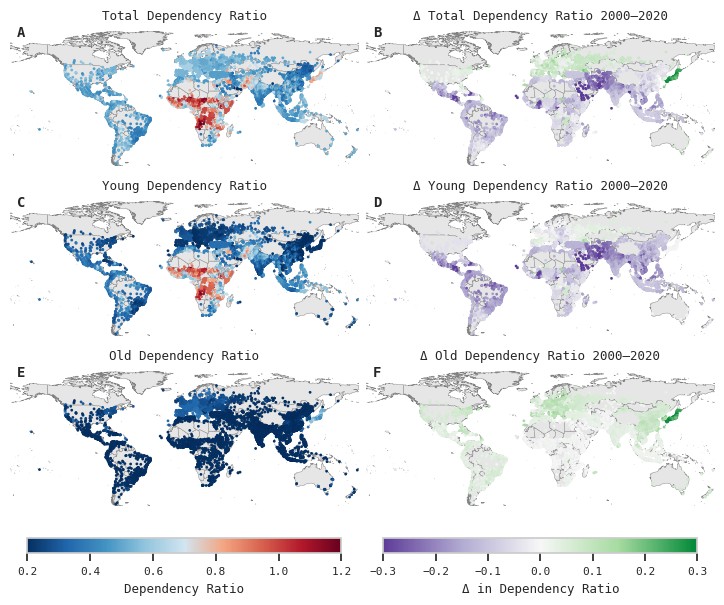

In [ ]:

# -------------------
# Font setup
# -------------------
font_prop = font_manager.FontProperties(family="DejaVu Sans Mono")
subplot_letters = ["A", "B", "C", "D", "E", "F"]

# -------------------
# Function to slightly darken a color
# -------------------
def darken_color(c, amount=0.01):
    """
    Darken a matplotlib color by multiplying its RGB components by `amount`.
    """
    c_rgb = colors.to_rgb(c)
    return tuple(np.array(c_rgb) * amount)

# -------------------
# Map plotting function
# -------------------
def plot_map(ax, data, column, cmap, vmin, vmax, title, letter=None):
    # Basemap
    world.plot(
        ax=ax,
        color="#E6E6E6",
        edgecolor="0.5",
        linewidth=0.3,
        zorder=1
    )

    # Normalize colors to colormap
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    rgba_colors = cmap(norm(data[column]))

    # Slightly darker edge color for each point
    edge_colors = np.array([darken_color(c[:3], 0.6) + (c[3],) for c in rgba_colors])

    # Scatter
    sc = ax.scatter(
        data["longitude"],
        data["latitude"],
        c=rgba_colors,
        s=4,
        edgecolor=edge_colors,
        linewidth=0.0005,
        zorder=2
    )

    # Axis styling
    ax.set_xlim(-180, 180)
    ax.set_ylim(-55, 90)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.grid(True, linestyle="--", linewidth=0.3, alpha=1)

    # Title
    ax.set_title(
        title,
        fontproperties=font_prop,
        fontsize=9,
        pad=4
    )

    # Subplot letter
    if letter:
        ax.text(
            0.02, 1, letter,
            transform=ax.transAxes,
            fontproperties=font_prop,
            fontsize=10,
            fontweight="bold",
            va="top",
            ha="left",
            zorder=3
        )

    return sc, norm

# -------------------
# Figure setup
# -------------------
fig, axes = plt.subplots(
    3, 2,
    figsize=(7.087, 6),  # 180mm x 
    constrained_layout=True
)

# Spacing pads
fig.set_constrained_layout_pads(
    w_pad=0.02,
    h_pad=0.02,
    hspace=0.02,
    wspace=0.02
)

# -------------------
# Plot each map
# -------------------
sc1, norm1 = plot_map(axes[0,0], annual_metrics_2020, "total_dr", cmap_dr, 0.2, 1.2,
                      "Total Dependency Ratio", letter=subplot_letters[0])

sc2, norm2 = plot_map(axes[0,1], change_data, "total_dr_Delta", cmap_delta, -0.3, 0.3,
                      "Δ Total Dependency Ratio 2000–2020", letter=subplot_letters[1])

sc3, norm3 = plot_map(axes[1,0], annual_metrics_2020, "young_dr", cmap_dr, 0.2, 1.2,
                      "Young Dependency Ratio", letter=subplot_letters[2])

sc4, norm4 = plot_map(axes[1,1], change_data, "young_dr_Delta", cmap_delta, -0.3, 0.3,
                      "Δ Young Dependency Ratio 2000–2020", letter=subplot_letters[3])

sc5, norm5 = plot_map(axes[2,0], annual_metrics_2020, "old_dr", cmap_dr, 0.2, 1.2,
                      "Old Dependency Ratio", letter=subplot_letters[4])

sc6, norm6 = plot_map(axes[2,1], change_data, "old_dr_Delta", cmap_delta, -0.3, 0.3,
                      "Δ Old Dependency Ratio 2000–2020", letter=subplot_letters[5])

# -------------------
# Colorbars (horizontal, compact)
# -------------------
cbar1 = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm1, cmap=cmap_dr),
    ax=axes[:,0],
    orientation="horizontal",
    fraction=0.04,
    pad=0.06,
    shrink=0.9
)

cbar2 = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm2, cmap=cmap_delta),
    ax=axes[:,1],
    orientation="horizontal",
    fraction=0.04,
    pad=0.06,
    shrink=0.9
)

# Colorbar labels
for cbar, label in zip([cbar1, cbar2], ["Dependency Ratio", "Δ in Dependency Ratio"]):
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.set_xlabel(label, fontsize=9, fontproperties=font_prop)

# -------------------
# Save as vector PDF, exact size
# -------------------
output_file = Path(figure_folder) / 'fig1_udr_map.pdf'
fig.savefig(
    output_file,
    format="pdf",
    bbox_inches='tight',
    pad_inches=0,
    dpi=300
)

plt.show()


# Figure 2 - Working-Age Sex Ratio (Global & Arabia Inset)

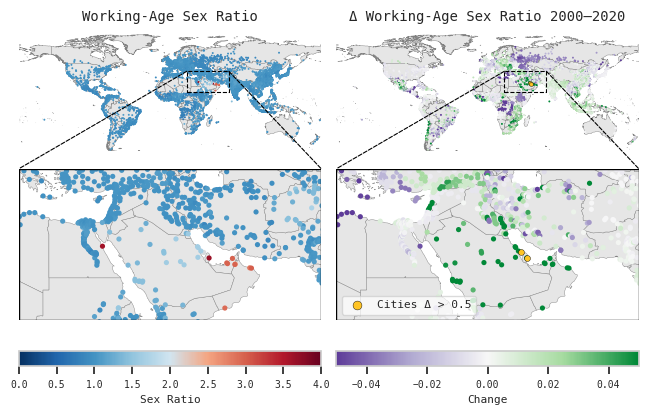

In [ ]:
# ============================================================
# FIGURE 2 — WORKING-AGE SEX RATIO AND CHANGE (ALL POINTS + HIGHLIGHT)
# ============================================================

# ============================================================
# COLORMAPS
# ============================================================

colors_sr = [
    "#053061", "#2166AC", "#4393C3", "#92C5DE",
    "#D1E5F0", "#F4A582", "#D6604D", "#B2182B", "#67001F"
]

colors_delta = [
    "#5e3c99", "#b2abd2", "#f7f7f7", "#a6dba0", "#008837"
]

cmap_sr = mcolors.LinearSegmentedColormap.from_list("sr", colors_sr)
cmap_delta = mcolors.LinearSegmentedColormap.from_list("delta", colors_delta)

# ============================================================
# INSET REGION
# ============================================================

INSET_XMIN = 20
INSET_XMAX = 70
INSET_YMIN = 15
INSET_YMAX = 40

highlight = change_data[change_data["working_sr_Delta"] > 0.5]

# ============================================================
# DRAW REGION BOX ON MAIN MAP
# ============================================================

def draw_region_box(ax):
    rect = Rectangle(
        (INSET_XMIN, INSET_YMIN),
        INSET_XMAX - INSET_XMIN,
        INSET_YMAX - INSET_YMIN,
        fill=False,
        linestyle="--",
        linewidth=0.8,
        edgecolor="black",
        zorder=4
    )
    ax.add_patch(rect)

# ============================================================
# DRAW BOX AROUND INSET PANEL
# ============================================================

def draw_inset_panel_box(ax):
    rect = Rectangle(
        (0,0), 1, 1,
        transform=ax.transAxes,
        fill=False,
        linewidth=1,
        edgecolor="black",
        zorder=5
    )
    ax.add_patch(rect)

# ============================================================
# CONNECT TOP CORNERS
# ============================================================

def connect_axes(fig, ax_main, ax_inset):
    con1 = ConnectionPatch(
        xyA=(INSET_XMIN, INSET_YMAX),
        coordsA=ax_main.transData,
        xyB=(0,1),
        coordsB=ax_inset.transAxes,
        linestyle="--",
        linewidth=0.8,
        color="black"
    )
    con2 = ConnectionPatch(
        xyA=(INSET_XMAX, INSET_YMAX),
        coordsA=ax_main.transData,
        xyB=(1,1),
        coordsB=ax_inset.transAxes,
        linestyle="--",
        linewidth=0.8,
        color="black"
    )
    fig.add_artist(con1)
    fig.add_artist(con2)

# ============================================================
# PLOT FUNCTION
# ============================================================

def plot_map(
    ax,
    data,
    column,
    cmap,
    title,
    vmin,
    vmax,
    inset=False,
    region_box=False,
    inset_box=False,
    highlight_points=None
):
    world.plot(
        ax=ax,
        color="#E6E6E6",
        edgecolor="0.5",
        linewidth=0.3,
        zorder=1
    )

    # slightly larger symbols in inset maps
    base_size = 14 if inset else 2

    # plot all points first
    sc = ax.scatter(
        data["longitude"],
        data["latitude"],
        c=data[column],
        cmap=cmap,
        s=base_size,
        vmin=vmin,
        vmax=vmax,
        linewidth=0,
        zorder=2
    )

    # overlay highlight points in bright yellow
    highlight_handle = None
    if highlight_points is not None and len(highlight_points):
        hl_size = 18 if inset else 8
        highlight_handle = ax.scatter(
            highlight_points["longitude"],
            highlight_points["latitude"],
            s=hl_size,
            facecolor="#ffc425",
            edgecolor="black",
            linewidth=0.3,
            zorder=3,
            label=f"Cities Δ > 0.5"
        )

    if region_box:
        draw_region_box(ax)
    if inset_box:
        draw_inset_panel_box(ax)

    if inset:
        ax.set_xlim(INSET_XMIN, INSET_XMAX)
        ax.set_ylim(INSET_YMIN, INSET_YMAX)
    else:
        ax.set_xlim(-180,180)
        ax.set_ylim(-55,90)

    ax.set_xticks([])
    ax.set_yticks([])

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.set_title(
        title,
        fontproperties=font_prop,
        fontsize=10
    )

    return sc, highlight_handle

# ============================================================
# FIGURE LAYOUT (move insets upward)
# ============================================================

fig, axes = plt.subplots(
    2,2,
    figsize=(8,6),
    gridspec_kw={'hspace':0.05, 'wspace':0.05}
)

# ============================================================
# MAIN MAPS
# ============================================================

sc1,_ = plot_map(
    axes[0,0],
    annual_metrics_2020,
    "working_sr",
    cmap_sr,
    "Working-Age Sex Ratio",
    0,4,
    region_box=True
)

vmin_delta, vmax_delta = -0.05, 0.05

sc2, hl = plot_map(
    axes[0,1],
    change_data,
    "working_sr_Delta",
    cmap_delta,
    "Δ Working-Age Sex Ratio 2000–2020",
    vmin_delta,
    vmax_delta,
    region_box=True,
    highlight_points=highlight
)

# ============================================================
# INSET MAPS
# ============================================================

sc3,_ = plot_map(
    axes[1,0],
    annual_metrics_2020,
    "working_sr",
    cmap_sr,
    "",
    0,4,
    inset=True,
    inset_box=True
)

sc4,_ = plot_map(
    axes[1,1],
    change_data,
    "working_sr_Delta",
    cmap_delta,
    "",
    vmin_delta,
    vmax_delta,
    inset=True,
    inset_box=True,
    highlight_points=highlight
)

# ============================================================
# CONNECTORS
# ============================================================

connect_axes(fig, axes[0,0], axes[1,0])
connect_axes(fig, axes[0,1], axes[1,1])

# ============================================================
# COLORBARS
# ============================================================

cbar1 = fig.colorbar(
    sc1,
    ax=[axes[0,0], axes[1,0]],
    orientation="horizontal",
    fraction=0.05,
    pad=0.08
)
cbar1.set_label("Sex Ratio", fontproperties=font_prop)
cbar1.ax.tick_params(labelsize=7)   # ← smaller numbers


cbar2 = fig.colorbar(
    sc2,
    ax=[axes[0,1], axes[1,1]],
    orientation="horizontal",
    fraction=0.05,
    pad=0.1
)
cbar2.set_label("Change", fontproperties=font_prop)
cbar2.ax.tick_params(labelsize=7)   # ← smaller numbers

# ============================================================
# LEGEND FOR HIGHLIGHT (yellow dot, bottom-left of inset)
# ============================================================

if hl is not None:
    axes[1,1].legend(
        frameon=True,
        fontsize=7,
        prop=font_prop,
        loc='lower left',
        markerscale=1.5,
        facecolor='white',
        framealpha=0.7
    )

# ============================================================
# FINAL SPACING
# ============================================================

plt.subplots_adjust(
    wspace=0.02,
    hspace=0.01,   # insets closer
    bottom=0.2,
    top=0.75      # move insets upward
)

output_file = Path(figure_folder) / 'fig2_usr_map.pdf'
fig.savefig(
    output_file,
    format="pdf",
    bbox_inches='tight',
    pad_inches=0,
    dpi=300
)


plt.show()


# Figure 3 - Boxplot of YDR across city sizes

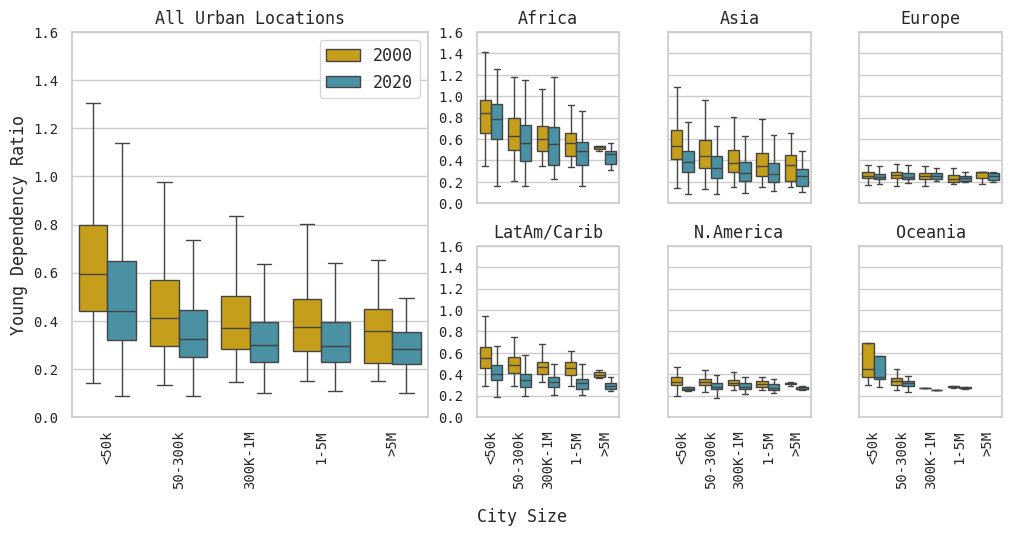

In [ ]:

# -----------------------------
# PREPARE DATA
# -----------------------------
boxplot_data = annual_metrics[['ID_UC_G0', 'year', 'young_dr', 'total_pop', 'Continent']].copy()
boxplot_data = boxplot_data[(boxplot_data['year'].isin([2000, 2020])) & (boxplot_data['Continent'] != "#N/A")]

# -----------------------------
# MAP CONTINENTS TO BROAD GROUPS (abbreviated)
# -----------------------------
continent_map = {
    'Oceania': 'Oceania',
    'Australia and New Zealand': 'Oceania',
    'Latin America and the Caribbean': 'LatAm/Carib',
    'Sub-Saharan Africa': 'Africa',
    'Northern Africa and Western Asia': 'Africa',
    'Europe': 'Europe',
    'Central and Southern Asia': 'Asia',
    'Eastern and South-Eastern Asia': 'Asia',
    'Northern America': 'N.America'
}
boxplot_data['ContinentGroup'] = boxplot_data['Continent'].map(continent_map)
boxplot_data = boxplot_data.dropna(subset=['ContinentGroup'])

# -----------------------------
# CATEGORIZE CITY SIZE
# -----------------------------
def city_size_label(pop):
    if pop <= 50000:
        return "<50k"
    elif 50000 < pop <= 300000:
        return "50-300k"
    elif 300000 < pop <= 1000000:
        return "300K-1M"
    elif 1000000 < pop <= 5000000:
        return "1-5M"
    else:
        return ">5M"

city_size_order = ["<50k", "50-300k", "300K-1M", "1-5M", ">5M"]
boxplot_data['CitySize'] = pd.Categorical(
    boxplot_data['total_pop'].apply(city_size_label),
    categories=city_size_order, ordered=True
)
boxplot_data['year'] = boxplot_data['year'].astype(str)

# -----------------------------
# FIGURE SETUP
# -----------------------------
sns.set(style="whitegrid")
mono_font = font_manager.FontProperties(family="DejaVu Sans Mono")
palette = {"2000":"#E1AF00", "2020":"#3B9AB2"}
continent_groups = ["Africa", "Asia", "Europe", "LatAm/Carib", "N.America", "Oceania"]

fig = plt.figure(figsize=(12, 5))
gs = GridSpec(2, 4, figure=fig, width_ratios=[2.5, 1, 1, 1], height_ratios=[1,1],
              wspace=0.25, hspace=0.25)

title_fontsize = 12
tick_fontsize_x = 10
tick_fontsize_y = 10

# -----------------------------
# LEFT PANEL: All Urban Locations
# -----------------------------
ax_all = fig.add_subplot(gs[:, 0])
sns.boxplot(
    data=boxplot_data,
    x='CitySize',
    y='young_dr',
    hue='year',
    palette=palette,
    dodge=True,
    linewidth=1,
    fliersize=0,
    showfliers=False,
    ax=ax_all
)
ax_all.set_ylabel("Young Dependency Ratio", fontproperties=mono_font, fontsize=title_fontsize)
ax_all.set_title("All Urban Locations", fontproperties=mono_font, fontsize=title_fontsize)
ax_all.set_ylim(0, 1.6)
ax_all.set_yticks([i*0.2 for i in range(9)])
ax_all.tick_params(axis='x', rotation=90, labelsize=tick_fontsize_x)
ax_all.set_xlabel(None)  # Remove the x-axis label


# manually set tick fonts
for tick in ax_all.get_yticklabels():
    tick.set_fontproperties(mono_font)
    tick.set_fontsize(tick_fontsize_y)
for tick in ax_all.get_xticklabels():
    tick.set_fontproperties(mono_font)
    tick.set_fontsize(tick_fontsize_x)

# legend only on main plot
handles, labels = ax_all.get_legend_handles_labels()
ax_all.legend(handles, labels, title="", prop=mono_font, loc='upper right')

# -----------------------------
# RIGHT PANEL: Split by Continent
# -----------------------------
for i, cont in enumerate(continent_groups):
    row = i // 3
    col = i % 3
    ax = fig.add_subplot(gs[row, col+1])
    cont_data = boxplot_data[boxplot_data['ContinentGroup'] == cont]
    
    sns.boxplot(
        data=cont_data,
        x='CitySize',
        y='young_dr',
        hue='year',
        palette=palette,
        dodge=True,
        linewidth=1,
        fliersize=0,
        showfliers=False,
        ax=ax
    )
    
    ax.set_title(cont, fontproperties=mono_font, fontsize=title_fontsize)
    ax.set_xlabel(None)  # Remove the x-axis label
    
    # show x-axis tick labels only on bottom row of subplots
    if row == 1:
        ax.set_xticks(range(len(city_size_order)))
        ax.set_xticklabels(city_size_order, fontproperties=mono_font, fontsize=tick_fontsize_x, rotation=90)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])
    
    # remove y-axis labels for non-left columns
    if col != 0:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("", fontproperties=mono_font, fontsize=title_fontsize)
    
    ax.set_ylim(0, 1.6)
    ax.set_yticks([i*0.2 for i in range(9)])
    
    # manually adjust y tick font size
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(mono_font)
        tick.set_fontsize(tick_fontsize_y)
    
    # remove legend from subplots
    ax.get_legend().remove()

# -----------------------------
# Single centered x-label under entire figure
# -----------------------------
fig.text(0.5, -0.1, "City Size", fontproperties=mono_font, fontsize=title_fontsize, ha='center')

output_file = Path(figure_folder) / 'fig3_citysize_ydr.pdf'
fig.savefig(
    output_file,
    format="pdf",
    bbox_inches='tight',
    pad_inches=0,
    dpi=300
)

plt.show()


# Figure 4 - Net Migration v Natural Change

/tmp/ipykernel_40580/634998202.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



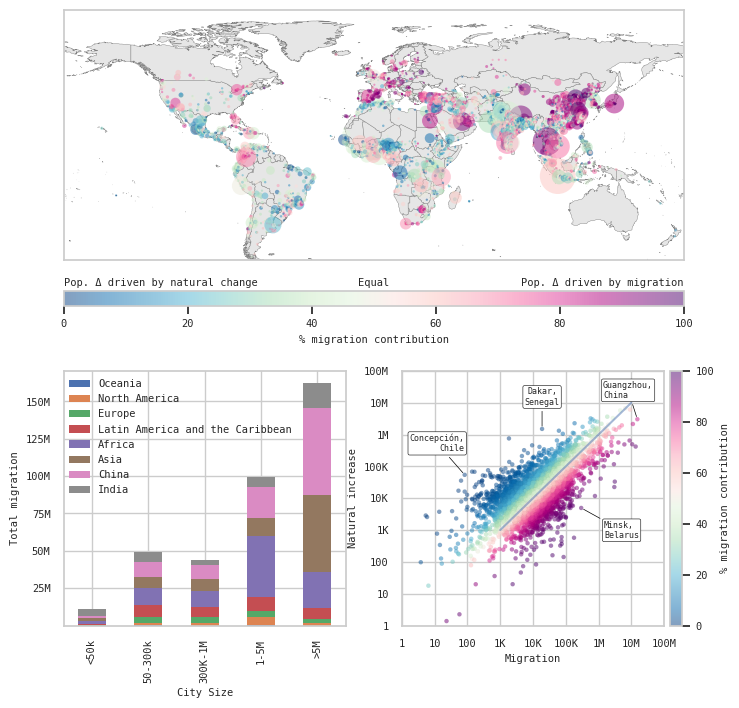

In [ ]:
# ============================================================
# FIGURE 4 — NET MIGRATION VS NATURAL CHANGE (FINAL REVISION)
# ============================================================

# ============================================================
# FONT SETUP
# ============================================================

font_prop = FontProperties(family="DejaVu Sans Mono", size=7.5)  # all non-city elements
small_font = font_prop  # for ticks or smaller text if needed
label_font = FontProperties(family="DejaVu Sans Mono", size=6)  # city labels remain smaller

mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['font.size'] = font_prop.get_size()


# ============================================================
# DATA PREP
# ============================================================

migration_map_data = change_data.copy()

migration_map_data = migration_map_data[
    (migration_map_data["total_migration"] > 0) &
    (migration_map_data["natural_change"] > 0)
].copy()


# ============================================================
# CONTINENT MAPPING
# ============================================================

continent_map = {

'Oceania': 'Oceania',
'Australia and New Zealand': 'Oceania',

'Latin America and the Caribbean': 'Latin America and the Caribbean',

'Sub-Saharan Africa': 'Africa',
'Northern Africa and Western Asia': 'Africa',

'Europe': 'Europe',

'Central and Southern Asia': 'Asia',
'Eastern and South-Eastern Asia': 'Asia',

'Northern America': 'North America'

}

migration_map_data["Continent"] = migration_map_data["Continent"].map(continent_map)

migration_map_data.loc[
migration_map_data["Country"]=="China","Continent"]="China"

migration_map_data.loc[
migration_map_data["Country"]=="India","Continent"]="India"


# ============================================================
# CITY SIZE
# ============================================================

def city_size_label(pop):

    if pop <= 50000:
        return "<50k"
    elif pop <= 300000:
        return "50-300k"
    elif pop <= 1000000:
        return "300K-1M"
    elif pop <= 5000000:
        return "1-5M"
    else:
        return ">5M"


city_size_order = ["<50k","50-300k","300K-1M","1-5M",">5M"]

migration_map_data["CitySize"] = pd.Categorical(
migration_map_data["total_pop_2020"].apply(city_size_label),
categories=city_size_order,
ordered=True
)


# ============================================================
# STACKED BAR
# ============================================================

stacked_data = migration_map_data.groupby(
["CitySize","Continent"],as_index=False
)["total_migration"].sum()

continent_order = [
"Oceania",
"North America",
"Europe",
"Latin America and the Caribbean",
"Africa",
"Asia",
"China",
"India"
]

stacked_data = stacked_data[
stacked_data["Continent"].isin(continent_order)
]

stacked_pivot = stacked_data.pivot_table(
index="CitySize",
columns="Continent",
values="total_migration",
fill_value=0
).reindex(index=city_size_order,columns=continent_order)


# ============================================================
# COLOR PALETTE
# ============================================================

nat_colors = ['#084081','#0868ac','#2b8cbe','#4eb3d3',
'#7bccc4','#a8ddb5','#ccebc5','#e0f3db']

mig_colors = ['#fde0dd','#fcc5c0','#fa9fb5','#f768a1',
'#dd3497','#ae017e','#7a0177','#49006a']

full_colors = nat_colors + mig_colors

cmap = mcolors.LinearSegmentedColormap.from_list(
"migration",
full_colors
)

norm = mcolors.Normalize(0,100)


# ============================================================
# SIZE SCALE
# ============================================================

sizes = np.interp(
migration_map_data["total_pop_Delta"],
(
migration_map_data["total_pop_Delta"].min(),
migration_map_data["total_pop_Delta"].max()
),
(2,800)
)


# ============================================================
# FIGURE LAYOUT
# ============================================================

fig = plt.figure(figsize=(8,8))

gs = GridSpec(
2,2,
height_ratios=[1.2,1],
hspace=0.2,
wspace=0.20
)


# ============================================================
# PANEL A MAP
# ============================================================

ax_map = fig.add_subplot(gs[0,:])

world.plot(
ax=ax_map,
color="#E6E6E6",
edgecolor="0.5",
linewidth=0.3
)

sc_map = ax_map.scatter(
migration_map_data.longitude,
migration_map_data.latitude,
c=migration_map_data.perc_from_migration,
cmap=cmap,
norm=norm,
s=sizes,
edgecolor="black",
linewidth=0,
alpha=0.5
)

ax_map.set_xlim(-180,180)
ax_map.set_ylim(-55,90)

ax_map.set_xticks([])
ax_map.set_yticks([])


# ============================================================
# WIDER COLORBAR
# ============================================================

cbar = fig.colorbar(
sc_map,
ax=ax_map,
orientation="horizontal",

fraction=0.08,   # wider
pad=0.10,
aspect=40        # wider shape
)

cbar.set_label(
    "% migration contribution",
    fontproperties=font_prop
)


# smaller tick font

for tick in cbar.ax.get_xticklabels():
    tick.set_fontproperties(font_prop)


# ============================================================
# TOP LABELS ABOVE COLORBAR
# ============================================================

cbar.ax.text(
0.0, 1.2,
"Pop. Δ driven by natural change",
ha='left',
va='bottom',
transform=cbar.ax.transAxes,
fontproperties=font_prop
)

cbar.ax.text(
0.5, 1.2,
"Equal",
ha='center',
va='bottom',
transform=cbar.ax.transAxes,
fontproperties=font_prop
)

cbar.ax.text(
1.0, 1.2,
"Pop. Δ driven by migration",
ha='right',
va='bottom',
transform=cbar.ax.transAxes,
fontproperties=font_prop
)


# ============================================================
# PANEL B BAR
# ============================================================

ax_bar = fig.add_subplot(gs[1,0])

stacked_pivot.plot(
kind="bar",
stacked=True,
ax=ax_bar,
linewidth=0
)

ax_bar.set_ylabel(
"Total migration",
fontproperties=font_prop
)

yticks = ax_bar.get_yticks()

ax_bar.set_yticklabels(
[f"{int(y/1e6)}M" if y>0 else "0" for y in yticks],
fontproperties=font_prop
)

for tick in ax_bar.get_xticklabels():
    tick.set_fontproperties(font_prop)

handles,labels = ax_bar.get_legend_handles_labels()

fig.legend(
    handles,
    labels,
    prop=font_prop,
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0.12,0.43)
)
ax_bar.set_xlabel("City Size",fontproperties=font_prop)

ax_bar.get_legend().remove()


# ============================================================
# PANEL C SCATTER
# ============================================================

ax_scatter = fig.add_subplot(gs[1,1])

sc = ax_scatter.scatter(
migration_map_data["total_migration"],
migration_map_data["natural_change"],
c=migration_map_data["perc_from_migration"],
cmap=cmap,
norm=norm,
s=10,
edgecolor="black",
linewidth=0.01,
alpha=0.5
)

ax_scatter.set_xscale("log")
ax_scatter.set_yscale("log")

lims = [1e3,1e7]

ax_scatter.set_xlim(lims)
ax_scatter.set_ylim(lims)

ax_scatter.plot(
lims,
lims,
alpha=0.5
)

ticks = [1,10,1e2,1e3,1e4,1e5,1e6,1e7,1e8]

labels = ["1","10","100","1K","10K","100K","1M","10M","100M"]

ax_scatter.set_xticks(ticks)
ax_scatter.set_xticklabels(labels,fontproperties=font_prop)

ax_scatter.set_yticks(ticks)
ax_scatter.set_yticklabels(labels,fontproperties=font_prop)

ax_scatter.set_xlabel("Migration",fontproperties=font_prop)
ax_scatter.set_ylabel("Natural increase",fontproperties=font_prop)


# scatter colorbar

cbar2 = fig.colorbar(
sc,
ax=ax_scatter,
fraction=0.05,
pad=0.02
)
for tick in cbar2.ax.get_yticklabels():  # for vertical colorbar
    tick.set_fontproperties(font_prop)

for tick in cbar2.ax.get_xticklabels():  # in case orientation='horizontal'
    tick.set_fontproperties(font_prop)


cbar2.set_label(
"% migration contribution",
fontproperties=font_prop
)
# ============================================================
# LABEL SELECTED CITIES (ADD CONCEPCIÓN)
# ============================================================

label_font = FontProperties(family="DejaVu Sans Mono", size=6)

label_specs = {

    ("Guangzhou", "China"): {
        "xmult": 0.09,
        "ymult": 4.0,
        "ha": "left",
        "va": "bottom"
    },

    ("Dakar", "Senegal"): {
        "xmult": 1.0,
        "ymult": 5.0,
        "ha": "center",
        "va": "bottom"
    },

    ("Minsk", "Belarus"): {
        "xmult": 5.0,
        "ymult": 0.4,
        "ha": "left",
        "va": "top"
    },

    ("Concepción", "Chile"): {
        "xmult": 1,
        "ymult": 20.0,
        "ha": "right",
        "va": "top"
    },


}

for (name, country), spec in label_specs.items():

    row = migration_map_data[
        (migration_map_data["Name"] == name) &
        (migration_map_data["Country"] == country)
    ]

    if row.empty:
        continue

    x = row["total_migration"].values[0]
    y = row["natural_change"].values[0]

    x_text = x * spec["xmult"]
    y_text = y * spec["ymult"]

    label_text = f"{name},\n{country}"

    ax_scatter.annotate(
        label_text,
        xy=(x, y),
        xytext=(x_text, y_text),
        textcoords="data",
        arrowprops=dict(
            arrowstyle="-",
            linewidth=0.5,
            color="black"
        ),
        bbox=dict(
            boxstyle="round,pad=0.2",
            fc="white",
            ec="black",
            linewidth=0.4
        ),
        fontproperties=label_font,
        ha=spec["ha"],
        va=spec["va"]
    )
# ============================================================
# SHOW
# ============================================================
output_file = Path(figure_folder) / 'fig4_migration.pdf'
fig.savefig(
    output_file,
    format="pdf",
    bbox_inches='tight',
    pad_inches=0,
    dpi=300
)

plt.show()
